In [5]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [6]:
# Ruta del archivo
direccion = r"C:\Users\Elias\Documents\Tercer proyecto individual\Datasets_limpios\movies_clean.parquet"

# Lectura del dataset
movies_credits = pd.read_parquet(direccion)

# Convertimos el dataset en un dataframe
movies_credits = pd.DataFrame(movies_credits)

# Mostramos las primeras 5 filas del dataframe
movies_credits.head()

,budget,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,name_collection,production_company,years,return_on_investment,genre
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,7.7,5415.0,Toy Story Collection,Pixar Animation Studios,1995,12.451801,Animation
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,No Collection,TriStar Pictures,1995,4.043035,Adventure
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,Warner Bros.,1995,0.000000,Romance
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,No Collection,Twentieth Century Fox Film Corporation,1995,5.090760,Comedy
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,Sandollar Productions,1995,0.000000,Comedy


In [7]:
# Creamos una funcion que describa el dataset

def describe_dataset(df):
    print("Shape del dataset: ", df.shape)
    print("\nColumnas: ", df.columns.tolist())
    print("\nNombres de columnas con valores nulos: ", df.isnull().sum().sort_values(ascending=False))
    print("\nEstadísticas descriptivas: ")

describe_dataset(movies_credits)

Shape del dataset:  (45376, 20)

Columnas:  ['budget', 'id', 'original_language', 'overview', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'name_collection', 'production_company', 'years', 'return_on_investment', 'genre']

Nombres de columnas con valores nulos:  tagline                 24978
overview                  941
runtime                   246
status                     80
original_language          11
id                          0
budget                      0
popularity                  0
revenue                     0
release_date                0
production_countries        0
spoken_languages            0
title                       0
vote_average                0
vote_count                  0
name_collection             0
production_company          0
years                       0
return_on_investment        0
genre                       0
dtype: int64

Estadísticas

In [8]:
# Rellenamos los valores nulos del dataframe
movies_credits.fillna(0, inplace=True)

# Revisamos si hay valores nulos después del rellenado
describe_dataset(movies_credits)

Shape del dataset:  (45376, 20)

Columnas:  ['budget', 'id', 'original_language', 'overview', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'name_collection', 'production_company', 'years', 'return_on_investment', 'genre']

Nombres de columnas con valores nulos:  budget                  0
id                      0
original_language       0
overview                0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
name_collection         0
production_company      0
years                   0
return_on_investment    0
genre                   0
dtype: int64

Estadísticas descriptivas: 


Despues de ver que el dataset tenia valores nulos, se rellenan los valores, de esta manera el dataframe esta listo para poder interpretarse de manera visual los datos dentro de este.

In [9]:
#Visualisamos los datos del dataframe
movies_credits.head(4)

,budget,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,name_collection,production_company,years,return_on_investment,genre
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,0,Toy Story,7.7,5415.0,Toy Story Collection,Pixar Animation Studios,1995,12.451801,Animation
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,No Collection,TriStar Pictures,1995,4.043035,Adventure
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,Warner Bros.,1995,0.000000,Romance
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,No Collection,Twentieth Century Fox Film Corporation,1995,5.090760,Comedy


### Idiomas predominantes en la industria cinematografica

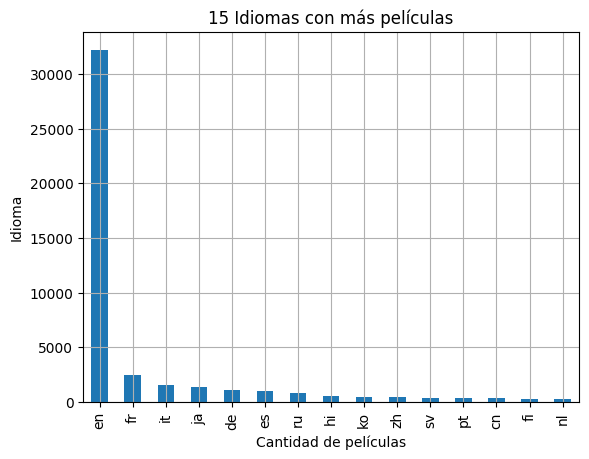

In [10]:
# De la columna ["original_language"] graficamos los 15 idiomas con mas peliculas
movies_credits["original_language"].value_counts().head(15).plot(kind='bar')
plt.title("15 Idiomas con más películas")
plt.xlabel("Cantidad de películas")
plt.ylabel("Idioma")
plt.grid()
plt.show()


#### Explicación

En esta grafíca observamos que la industria cinematografica se desarrolla dominantemente en el idioma ingles. Esto se debe,a que, en Estados unidos se concentra la mayoria las compañias que desarrollan las pelicuals mismas y a su vez, la cultura del consumismo hace que la población de este pais, sea su principal consumidor.
También se puede ver que hay paises como Francia, Alemania, Italia y España con un número muy bajo de películas. Esto puede ser debido a que estos países son parte de la economía global y tienen una cultura más tradicional en la que las películas son más comunes.

### Nube de palabras

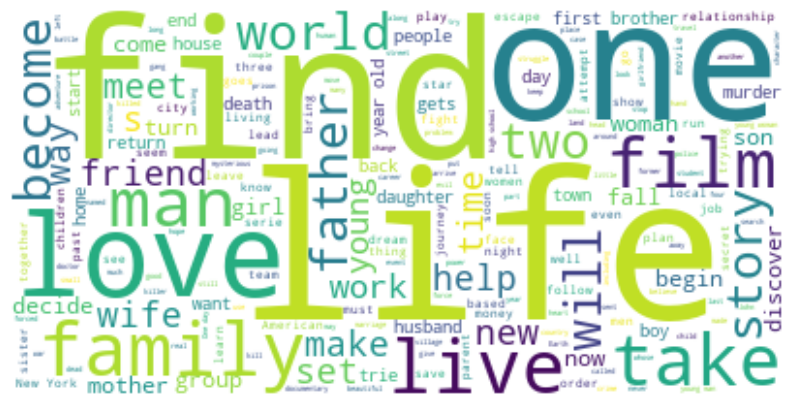

In [11]:
# Graficamos la columna ["overview"] en una nube de palabras
text = " ".join(str(review) for review in movies_credits.overview if isinstance(review, str))

# Generamos la nube de palabras con fondo blanco
wordcloud = WordCloud(background_color='white').generate(text)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Explicación


En esta nube de palabras, podemos observar cual es el tema pricipal que tocan la mayoria de las peliculas

### Popularidad de las peliculas

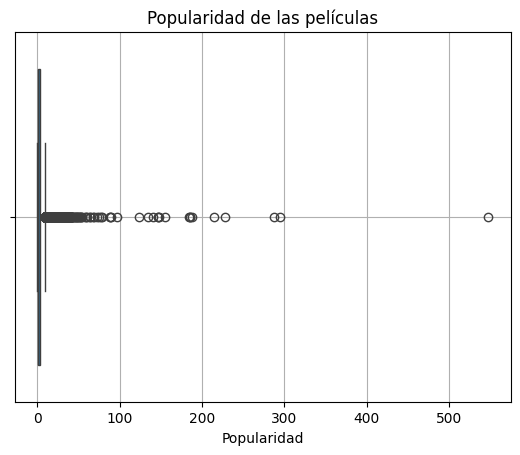

In [12]:
# Graficamos la columna ["popularity"] con un boxplot
sns.boxplot(x=movies_credits["popularity"])
plt.title("Popularidad de las películas")
plt.xlabel("Popularidad")
plt.grid()
plt.show()

### Explicación

Observamos como en esta grafica de boxplot encontramos outliers que sobrepasan el 100% de la popularidad, siendo 100 al 200 donde encontramos mas valores atipicos, siendo mas de 500 el outliers con la popularidad mas alta de todas.

### Recaudación de películas por genero

C:\Users\Elias\AppData\Local\Temp\ipykernel_8896\207475153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


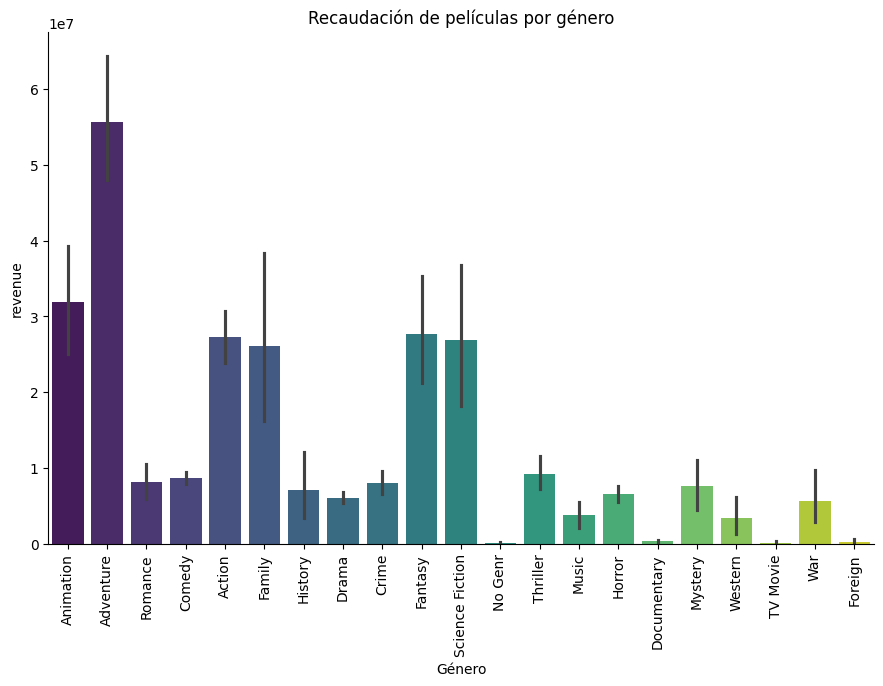

In [13]:
# Graficamos la columna ["revenue"] y la columna ["genre"] con una paleta de colores
g = sns.catplot(
    x="genre", 
    y="revenue", 
    data=movies_credits, 
    kind="bar", 
    height=6, 
    aspect=1.5, 
    palette="viridis"  # Puedes elegir otras paletas, como "coolwarm", "Blues", "Reds", etc.
)

# Rotamos las etiquetas del eje X sin cambiar los valores
g.ax.tick_params(axis='x', rotation=90)

plt.title("Recaudación de películas por género")
plt.xlabel("Género")
plt.show()


In [14]:
# Sumamos la recaudacion de cada genero 
revenue_per_genre = movies_credits.groupby("genre")["revenue"].sum()

# Ordenamos los valores
revenue_per_genre.sort_values(ascending=True)

genre
Foreign            2.581983e+07
TV Movie           4.200000e+07
No Genr            1.865616e+08
Documentary        1.041996e+09
Western            1.495569e+09
Music              1.809677e+09
History            1.974426e+09
War                2.123702e+09
Mystery            4.178854e+09
Romance            9.608171e+09
Crime              1.358045e+10
Family             1.367833e+10
Thriller           1.534788e+10
Horror             1.708864e+10
Science Fiction    1.734313e+10
Fantasy            1.949264e+10
Animation          3.585227e+10
Drama              7.253675e+10
Comedy             7.585123e+10
Adventure          8.427128e+10
Action             1.220476e+11
Name: revenue, dtype: float64

### Explicación

Las peliculas del genero aventura son las peliculas con mas recaudación, siendo el genero de la animación el 2do lugar en recaudacion siendo uno de los generos mas fuertes y presentes en el cine. Podemos observar que, hay 4 categorias que se disputan su precensia o que van casi a la par en cuestion de recaudación. Estas son Actión, Family, Fantasy, Science Fictión.

#### Las 10 peliculas con mas recaudación

C:\Users\Elias\AppData\Local\Temp\ipykernel_8896\1322299916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


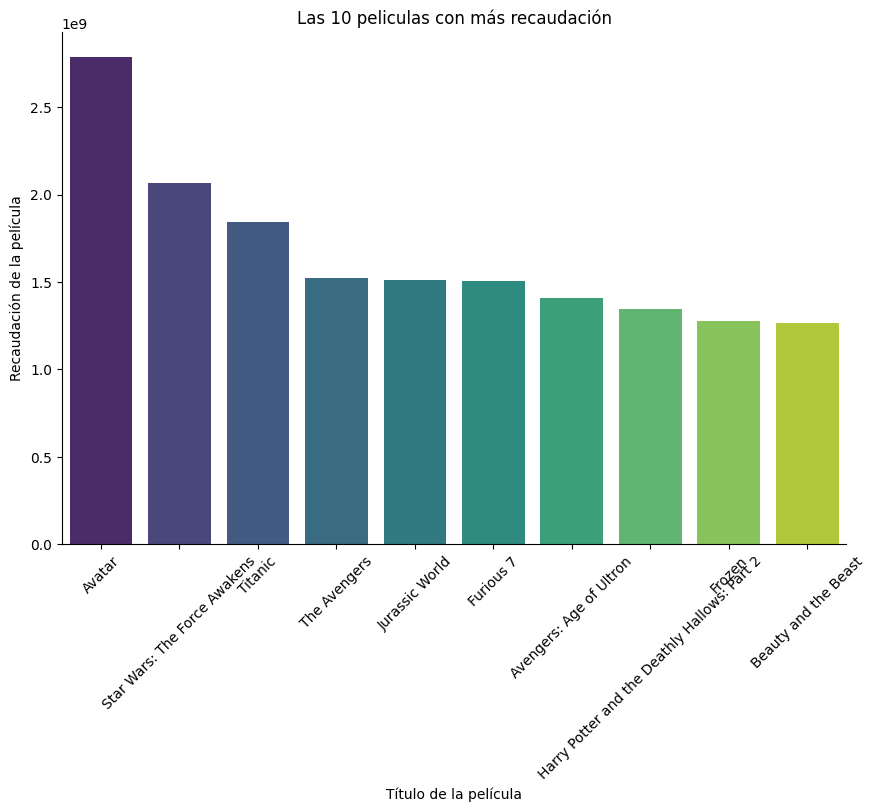

In [15]:
# Graficamos la columna ["revenue"] y la columna ["title"] con una paleta de colores
g = sns.catplot(
    x="title", 
    y="revenue", 
    data=movies_credits.nlargest(10, "revenue"), 
    kind="bar", 
    height=6, 
    aspect=1.5, 
    palette="viridis" 
)

# Rotamos las etiquetas del eje X sin cambiar los valores
g.ax.tick_params(axis='x', rotation=45)
plt.title("Las 10 peliculas con más recaudación")
plt.xlabel("Título de la película")
plt.ylabel("Recaudación de la película")
plt.show()

### Duración de las peliculas

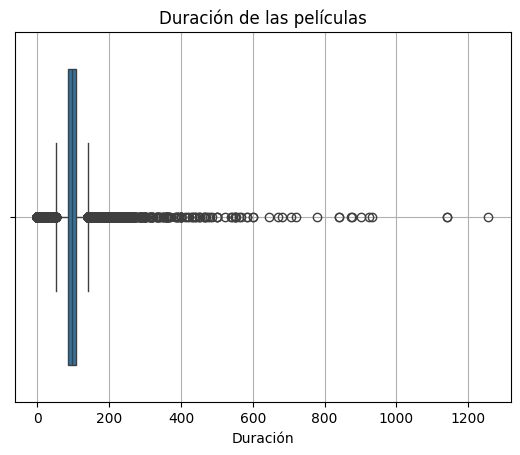

C:\Users\Elias\AppData\Local\Temp\ipykernel_8896\217163845.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


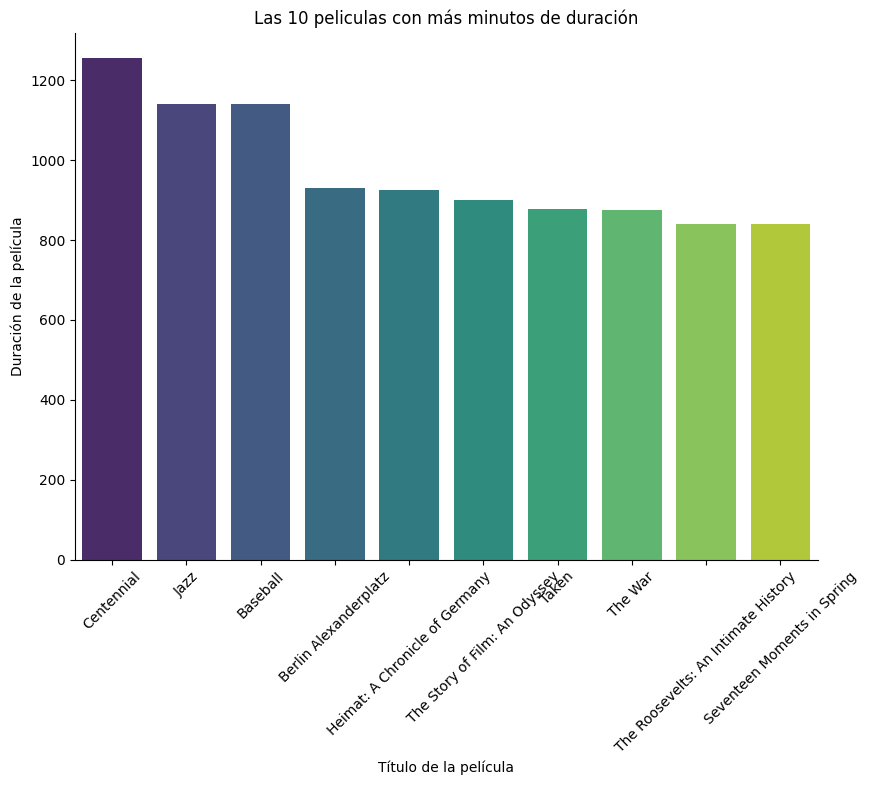

In [16]:
# Graficamos la columna ["runtime"] con un botplox para encontrar valores atipicos
sns.boxplot(x=movies_credits["runtime"])
plt.title("Duración de las películas")
plt.xlabel("Duración")
plt.grid()
plt.show()

# Graficamos las 10 peliculas con mas minutos de duración
g = sns.catplot(
    x="title", 
    y="runtime", 
    data=movies_credits.nlargest(10, "runtime"), 
    kind="bar", 
    height=6, 
    aspect=1.5, 
    palette="viridis" 
)

# Rotamos las etiquetas del eje X sin cambiar los valores
g.ax.tick_params(axis='x', rotation=45)
plt.title("Las 10 peliculas con más minutos de duración")
plt.xlabel("Título de la película")
plt.ylabel("Duración de la película")
plt.show()

### Explicación

Esta grafica, nos deja con asombro dado los outliers que encontramos en la grafíca. Observamos que la pelicula de mas larga duración de este dataset dura mas de 1200 minutos. Seguida de 2 peliculas de mas de 1000 minutos. Esto puede ser explicado dado que pueden ser documentales de larga duracion.

### Estatus de la pelicula

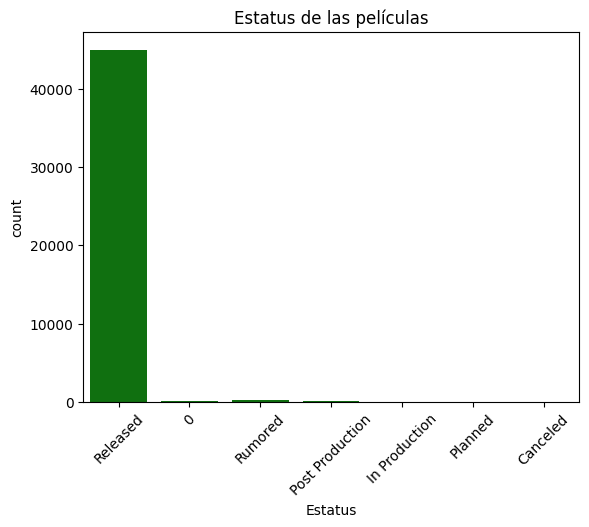

Detalles de la grafica


status
Released           44936
Rumored              230
Post Production       97
0                     80
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [17]:
# Graficamos la columna ["status"], para visualizar el estado de las peliculas 
sns.countplot(x=movies_credits["status"],color= "green")
plt.xticks(rotation=45)
plt.title("Estatus de las películas")
plt.xlabel("Estatus")
plt.show()

# Hacemos una suma de cada estatus y lo mostramos
print("Detalles de la grafica")
status_count = movies_credits["status"].value_counts()
status_count

### Puntuación 

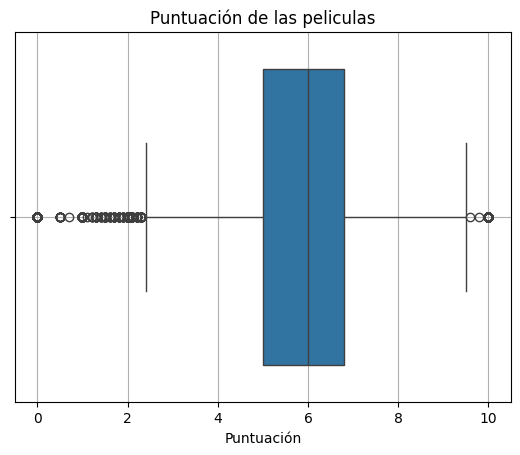

In [18]:
# Graficamos la columna ["vote_average"], hacemos un botplox para saber como esta distribuido las puntuaciones
sns.boxplot(x=movies_credits["vote_average"])
plt.title("Puntuación de las peliculas")
plt.xlabel("Puntuación")
plt.grid()
plt.show()

In [19]:
# calculamos los generos con puntuaciones menores de 4 
low_rated_movies_genres = movies_credits[movies_credits["vote_average"] < 4]
print("Peliculas con una calificacion menor a 4")
low_rated_movies_genres[["title", "vote_average", "genre"]]

# Graficamos el resultado encontrado
low_rated_movies_genres_grouped = low_rated_movies_genres.groupby("genre")["title"].count().sort_values(ascending=False)
print("Cantidad de peliculas con una calificacion menor a 4 por genero")
low_rated_movies_genres_grouped

Peliculas con una calificacion menor a 4
Cantidad de peliculas con una calificacion menor a 4 por genero


genre
Drama              997
No Genr            819
Comedy             808
Documentary        503
Action             480
Horror             424
Thriller           203
Romance            145
Adventure          137
Crime              127
Science Fiction    106
Western             97
Fantasy             80
TV Movie            68
Music               65
Family              58
Mystery             57
Animation           46
History             32
War                 31
Foreign             10
Name: title, dtype: int64

#### Explicación

Observamos que las puntuaciones en general del dataset se localizan en el rango de 5  a  7 de calificacion, encontrando peliculas con una calificación menor a 3, estas puntuaciones menores a 3 se debera a la mala producción, mal guion, mal titulo, malos actores etc. Observamos que el genero de drama y el de comedia, son los generos con menor puntuación.

### Votos por pelicula

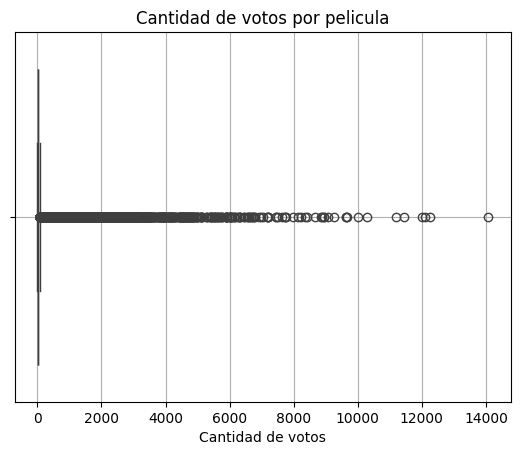

In [20]:
# Graficamos la columna ["vote_count"] y buscamos el genero con mas votos
sns.boxplot(x=movies_credits["vote_count"])
plt.title("Cantidad de votos por pelicula")
plt.xlabel("Cantidad de votos")
plt.grid()
plt.show()

C:\Users\Elias\AppData\Local\Temp\ipykernel_8896\1486327085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


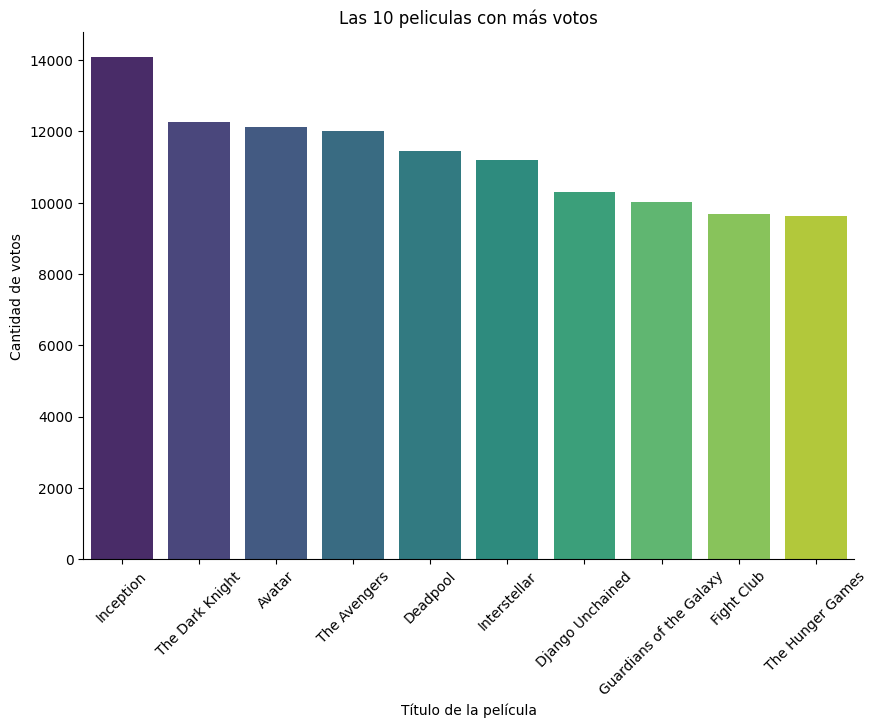

In [21]:
# Graficamos las 10 peliculas con mas votos
g = sns.catplot(
    x="title", 
    y="vote_count", 
    data=movies_credits.nlargest(10, "vote_count"), 
    kind="bar", 
    height=6, 
    aspect=1.5, 
    palette="viridis" 
)

# Rotamos las etiquetas del eje X sin cambiar los valores
g.ax.tick_params(axis='x', rotation=45)
plt.title("Las 10 peliculas con más votos")
plt.xlabel("Título de la película")
plt.ylabel("Cantidad de votos")
plt.show()

In [22]:
# Mostramos la pelicula con mas votos
highest_voted_movie = movies_credits.nlargest(1, "vote_count")
print("Pelicula con mas votos")
highest_voted_movie[["title", "vote_count", "genre"]]


Pelicula con mas votos


,title,vote_count,genre
15480,Inception,14075.0,Action


### Nube de palabras con los titulos de las peliculas

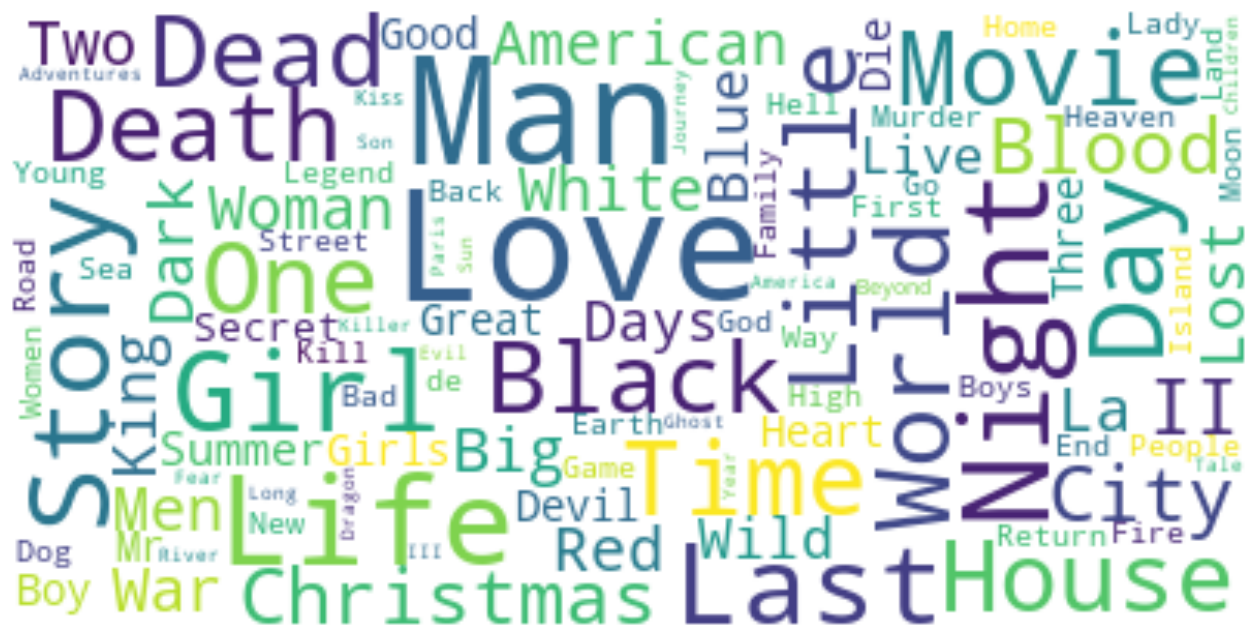

In [23]:
# Hacemos una nube de palabraas con la columna ["title"] 
wordcloud = WordCloud(
    background_color="white",
    max_words=100,
    max_font_size=50,
    normalize_plurals=False,
    colormap="viridis"
)
wordcloud.generate(" ".join(movies_credits["title"]))

# Mostramos la imagen de la nube de palabras
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#### Explicación

En esta nube de palabras podemos observar los titulos de las peliculas que se repiten con mas frecuencia.

### Compañias cinematografícas con mas producciónes

In [24]:
# Agrupamos y sumamos las peliculas por compañia ["production_company"]
production_companies_grouped = movies_credits.groupby("production_company")["title"].count().sort_values(ascending=False)
print("Compañias con mas producciónes")
production_companies_grouped.head()

Compañias con mas producciónes


production_company
No Production Company                     11796
Paramount Pictures                          998
Metro-Goldwyn-Mayer (MGM)                   852
Twentieth Century Fox Film Corporation      780
Warner Bros.                                757
Name: title, dtype: int64

C:\Users\Elias\AppData\Local\Temp\ipykernel_8896\1979848501.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


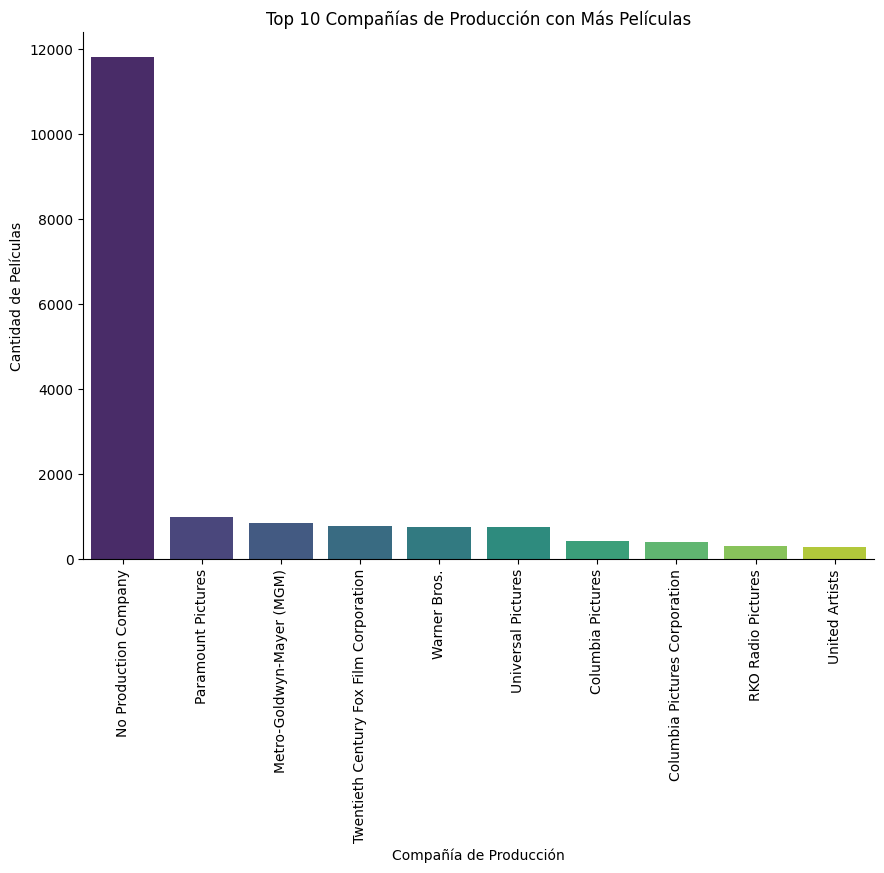

In [25]:
# Agrupamos por 'production_company' y contamos la cantidad de películas, ordenando de mayor a menor
top_companies_counts = (
    movies_credits['production_company']
    .value_counts()
    .nlargest(10)
    .sort_values(ascending=False)
)

# Creamos un DataFrame con las compañías y el conteo de producciones
top_movies_credits = movies_credits[movies_credits['production_company'].isin(top_companies_counts.index)]

# Graficamos las 10 compañías con más producciones en orden descendente
g = sns.catplot(
    data=top_movies_credits,
    x="production_company", 
    kind="count", 
    height=6, 
    aspect=1.5, 
    order=top_companies_counts.index,  # Ordenamos por el conteo
    palette="viridis"
)

# Ajustamos la rotación de las etiquetas del eje X
g.ax.tick_params(axis='x', rotation=90)
plt.title("Top 10 Compañías de Producción con Más Películas")
plt.xlabel("Compañía de Producción")
plt.ylabel("Cantidad de Películas")
plt.show()


#### Explicación

En esta grafica, observamos que, hay un gran procentaje de peliculas que no tienen un registro de compañia que las elabora, esto se debe a que esas peliculas son elaboradas por otros medios como cinetecas o por universidades, escuelas de cine, etc. Se identifica que Paramount Pictures es la compañia que ha producido mas peliculas.

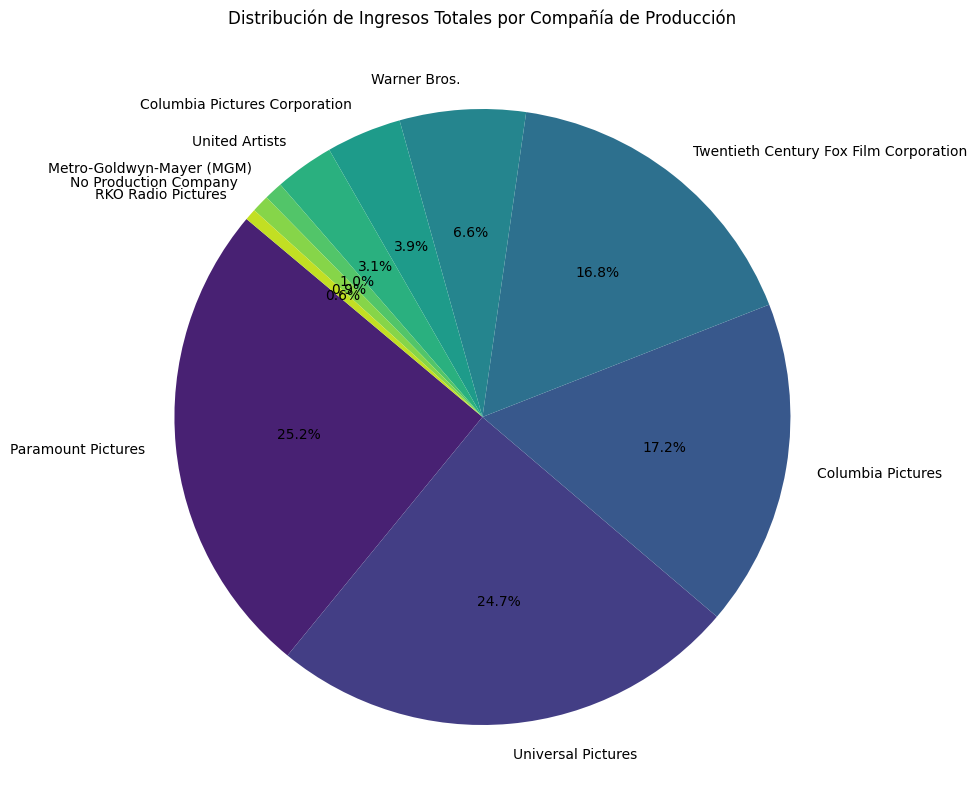

Compañias con mas recaudación


production_company
Paramount Pictures                        4.682446e+10
Universal Pictures                        4.585092e+10
Columbia Pictures                         3.190780e+10
Twentieth Century Fox Film Corporation    3.118277e+10
Warner Bros.                              1.227406e+10
Columbia Pictures Corporation             7.337477e+09
United Artists                            5.770643e+09
Metro-Goldwyn-Mayer (MGM)                 1.813838e+09
No Production Company                     1.703071e+09
RKO Radio Pictures                        1.122452e+09
Name: revenue, dtype: float64

In [26]:
# Sumamos la recaudacion de las 10 compañias con mas producción
total_revenue_by_companies = (
    top_movies_credits.groupby("production_company")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

# Gráfico de torta de ingresos por compañía
plt.figure(figsize=(10, 10))
plt.pie(
    total_revenue_by_companies.values, 
    labels=total_revenue_by_companies.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(total_revenue_by_companies))
)

# Configuración del gráfico
plt.title("Distribución de Ingresos Totales por Compañía de Producción")
plt.show()

print("Compañias con mas recaudación")
total_revenue_by_companies

#### Expliación

En esta grafica observamos un dato en particular, notamos que la compañia productora con mas recaudación hasta esta fecha, es la misma que ha sacado mas peliculas en la historia, vease("Top 10 compañias de producción con mas peliculas"). 

### Titulos con mayor retorno de inversión

C:\Users\Elias\AppData\Local\Temp\ipykernel_8896\1182097871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


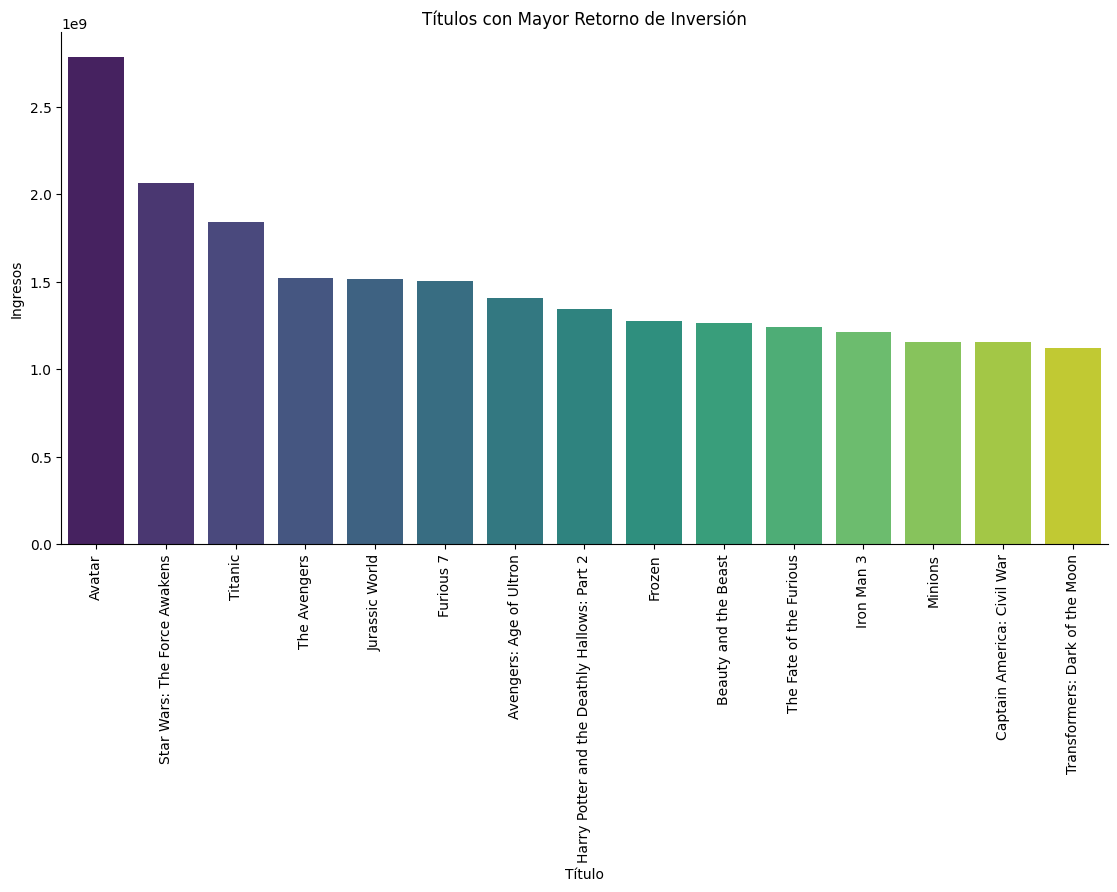

In [27]:
# Buscamos las 10 peliculas con mas retorno de recaudación
highest_revenue_movies = movies_credits.nlargest(15, "revenue")
highest_revenue_movies[["title", "revenue", "genre"]]

# Graficamos el dataframe ["highest_revenue_movies"]
g = sns.catplot(
    data=highest_revenue_movies,
    x="title", 
    y="revenue", 
    kind="bar", 
    height=6, 
    aspect=2, 
    palette="viridis"
)

# Ajustamos la rotación de las etiquetas del eje X
g.ax.tick_params(axis='x', rotation=90)
plt.title("Títulos con Mayor Retorno de Inversión")
plt.xlabel("Título")
plt.ylabel("Ingresos")
plt.show()


#### Explicación

Aunque puede parecer redundante, esta grafíca nos muestra las peliculas que tuvieron un mayor retorno de inversión. Es decir, la ganancia supera en tanto a la inversión. Siendo Avatar la pelicula con mejor retorno de inversión. 

### Directores que mas peliculas han dirigido

In [28]:
# Hacemos una suma de las peliculas que han sido dirigidas por los directores ["director"]

director_count = movies_credits["Director"].value_counts().nlargest(10)

# Graficamos la cantidad de peliculas que han sido dirigidas por los directores

plt.figure(figsize=(10, 10))
plt.pie(
    director_count.values, 
    labels=director_count.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(director_count))
)
plt.title("Porcentaje de peliculas dirigidas por Directores")
plt.show()

director_count 

KeyError: 'Director'

### Explicación

En esta grafica se observa los directores que mas peliculas han dirigido a lo alrgo de su trayectoria, vemos a la cabeza el director Jhon Ford con 63 peliculas, y casi a la par el director Michael Curtiz con 61 peliculas.

### Generos de peliculas predominantes

C:\Users\Elias\AppData\Local\Temp\ipykernel_15856\2921473383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movies_credits["genre"],palette= "viridis")


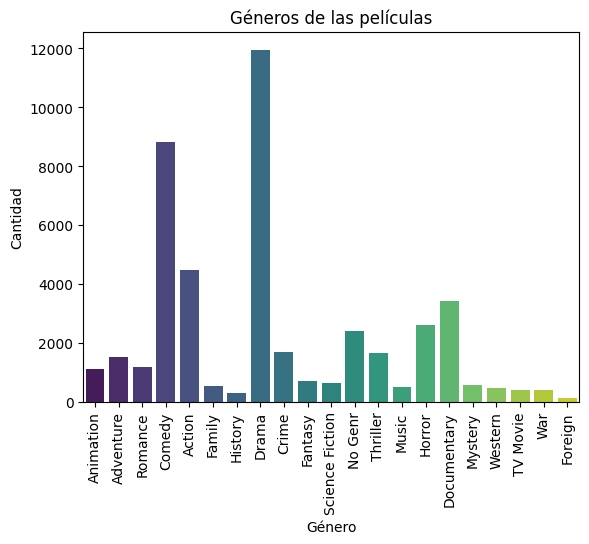

 Cantidad de peliculas por genero


genre
Drama              11961
Comedy              8819
Action              4486
Documentary         3404
Horror              2619
No Genr             2384
Crime               1684
Thriller            1665
Adventure           1513
Romance             1191
Animation           1122
Fantasy              704
Science Fiction      646
Mystery              552
Family               524
Music                487
Western              451
TV Movie             389
War                  379
History              278
Foreign              118
Name: count, dtype: int64

In [ ]:
# Graficamos la columna ["genre"], para visualizar los datos
sns.countplot(x=movies_credits["genre"],palette= "viridis")
plt.xticks(rotation=90)
plt.title("Géneros de las películas")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

# Obtenemoos los datos exaactos de las columnas
print(" Cantidad de peliculas por genero")
genre_count = movies_credits["genre"].value_counts().sort_values(ascending=False)
genre_count

#### Explicación

La grafíca muestra datos que hace pensar a uno, como por ejemplo, que el genero de drama tiene una cantidad increible de peliculas, seguidas del genero de comedia. Entre estos generos, se puede decir que casi la mitad de las peliculas pertenece a uno de estos 2 generós.
Sorprendentemente, si revisamos las recaudaciones de estos generos (vease: Recaudacion de peliculas por genero), observamos que su recaudacion es muy minima, es decir, que el genero de drama y comedia a pesar de tener bastantes peliculas, no es proporcional a su recaudación o se puede traducir que las peliculas de estos generos no tienen tanta popularidad.